# Figure 3 - Heterogeneity (+ Supp. Figs.)

In [30]:
# load external dependencies
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.lines as lines
from matplotlib.ticker import FuncFormatter,MaxNLocator
import matplotlib.patheffects as PathEffects
%matplotlib inline

import json, matplotlib
s = json.load( open("matplotlibrc.json") )
matplotlib.rcParams.update(s)

import glob, os, re
import numpy as np
import pandas as pd # (*) Pandas for data manipulation

# load internal dependencies
import colors,plot,stats,utils
from config import *
from paths import * # absolute file path for data directory

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data import

Top panels - Import subclonal frequency

In [31]:
# load data
seq_st_df = utils.load_data(dir_data+'seq/seq_st_df.pickle')

# compute cumulative haplotype frequencies for major subclones
seq_st_df['clonal'] = seq_st_df.apply(lambda row: 
                                      row[['subclone A','subclone B','subclone C','subclone D']].fillna(0).sum(), 
                                      axis=1)
# calculate the remaining bulk fraction
seq_st_df['bulk'] = 1.0 - seq_st_df['clonal']

seq_st_df.head()

,background,cross,cross_rep,selection,selection_rep,subclone A,subclone B,subclone C,subclone D,time,population,sample,clonal,bulk
0,WAxNA,F12,2,RM,2,0.0200,NaN,NaN,NaN,2,WAxNA_F12_2_RM_2,WAxNA_F12_2_RM_2_T2,0.0200,0.9800
1,WAxNA,F12,2,RM,2,0.0200,NaN,NaN,NaN,4,WAxNA_F12_2_RM_2,WAxNA_F12_2_RM_2_T4,0.0200,0.9800
2,WAxNA,F12,2,RM,2,0.0705,NaN,NaN,NaN,8,WAxNA_F12_2_RM_2,WAxNA_F12_2_RM_2_T8,0.0705,0.9295
3,WAxNA,F12,2,RM,2,0.1196,NaN,NaN,NaN,16,WAxNA_F12_2_RM_2,WAxNA_F12_2_RM_2_T16,0.1196,0.8804
4,WAxNA,F12,2,RM,2,0.1098,NaN,NaN,NaN,32,WAxNA_F12_2_RM_2,WAxNA_F12_2_RM_2_T32,0.1098,0.8902


Middle panels - Import mutation counts

In [81]:
# load data
seq_lineage = utils.load_data(dir_data+'seq/seq_dn_df.pickle')
seq_lineage.protein_position = seq_lineage.protein_position.apply(str)
isec1 = utils.load_data(dir_data+'seq/seq_dn_df_isec1_multi.pickle')
isec1 = isec1[isec1.gene.isin(['RNR2','RNR4','TOR1','TOR2','FPR1'])]
isec2 = utils.load_data(dir_data+'seq/seq_dn_df_isec2_multi.pickle')

# seq_dn_df = seq_dn_df[seq_dn_df['population'].notnull()]

seq_dn_df = pd.concat([isec1,isec2]).drop_duplicates(subset=['population','sample','chrom','pos','gene',
                                                             'cds_position','substitution',
                                                             'protein_position','amino_acids'])

seq_dn_df = seq_dn_df.reset_index(drop=True)

seq_dn_df = pd.merge(seq_dn_df, seq_lineage[['population','sample','gene','protein_position','amino_acids','assignment']], 
                     on=['population','sample','protein_position','amino_acids','gene'], how='left')


# seq_dn_df = pd.merge(seq_dn_df, seq_lineage[['population','gene','assignment']], 
#                      on=['population','gene'], how='left')

# seq_dn_df.loc[seq_dn_df.assignment.isnull(),'assignment'] = 'bulk'

seq_dn_df.loc[seq_dn_df.gene.isin(['RNR2','RNR4','FPR1','TOR1','TOR2','NUP100']),'mutation_type'] = 'driver'
seq_dn_df.loc[~seq_dn_df.gene.isin(['RNR2','RNR4','FPR1','TOR1','TOR2','NUP100']),'mutation_type'] = 'passenger'

seq_dn_df.loc[seq_dn_df.assignment.isnull(),'assignment'] = 'bulk'

# Coarse-grained categories of functional effects
dict_consequence = {
'missense_variant': 'non-synonymous', 
'stop_gained': 'non-synonymous', 
'synonymous_variant': 'synonymous', 
'initiator_codon_variant': 'synonymous',
'frameshift_variant': 'non-synonymous',
'inframe_insertion': 'synonymous',
'inframe_deletion': 'synonymous',
}
seq_dn_df['consequence_short'] = seq_dn_df['consequence'].map(dict_consequence)

seq_dn_df.head()

,ac,alt,an,allele,amino_acids,biotype,bqb,cds_position,chrom,codons,...,sample,population,coverage,unnamed: 22,unnamed: 23,missing,substitution,assignment,mutation_type,consequence_short
0,1,[A],10,A,K/M,protein_coding,0.672364,341,7,aAg/aTg,...,NA_HU_1_T16,NA_HU_1,28.53780013,,,NaN,T>A,bulk,driver,non-synonymous
1,1,[A],10,A,K/M,protein_coding,0.672364,341,7,aAg/aTg,...,NA_HU_1_T2,NA_HU_1,46.96931514,,,NaN,T>A,bulk,driver,non-synonymous
2,1,[A],10,A,K/M,protein_coding,0.672364,341,7,aAg/aTg,...,NA_HU_1_T32,NA_HU_1,49.27411074,,,NaN,T>A,bulk,driver,non-synonymous
3,1,[A],10,A,K/M,protein_coding,0.672364,341,7,aAg/aTg,...,NA_HU_1_T4,NA_HU_1,39.97017416,,,NaN,T>A,bulk,driver,non-synonymous
4,1,[A],10,A,K/M,protein_coding,0.672364,341,7,aAg/aTg,...,NA_HU_1_T8,NA_HU_1,46.22259588,,,NaN,T>A,bulk,driver,non-synonymous


Bottom panels - Import pheno evolution

In [43]:
# load data
pheno_df = utils.load_data(dir_data+'pheno/pheno_populations_norm.pickle')

# # filter out strains used for spatial control
# pheno_df = pheno_df[(pheno_df.group == 'ancestral')|\
#                     (pheno_df.group == 'evolved')]
        
groups_1 = pheno_df.groupby(['group','cross_rep','selection_rep'])
pheno_df = pheno_df[pheno_df.selection_rep != '']

for (ii,((group,cross_rep,selection_rep),g1)) in enumerate(groups_1):
    
    if selection_rep!='':
        df = groups_1.get_group(('ancestral',cross_rep,''))        
        df = df.replace([''],[selection_rep])
        
        pheno_df = pheno_df.append(df)
        
pheno_df['population'] = pheno_df['background']+'_'+pheno_df['cross']+'_'+pheno_df['cross_rep'].apply(str)+'_'+pheno_df['selection']+'_'+pheno_df['selection_rep'].apply(str)

pheno_df.head()  # show dataframe header to stdout

,selection,environment,run,index,plate,row,column,id,id_plate,group,...,isolate,gene,genotype_short,genotype_long,amino_acids,mating,auxotrophy,doubling_time,growth_rate,population
2,RM,RM,1,2,0,0,2,P6_A1,6,evolved,...,1,,+/+,,,MATa/α,,0.039118,0.973249,WAxNA_F12_1_RM_4
3,RM,RM,1,3,0,0,3,P7_A1,7,evolved,...,1,,+/+,,,MATa/α,,-0.802399,1.743999,WAxNA_F12_1_RM_3
6,RM,RM,1,6,0,0,6,P6_A2,6,evolved,...,2,,+/+,,,MATa/α,,-0.496987,1.411263,WAxNA_F12_1_RM_4
7,RM,RM,1,7,0,0,7,P7_A2,7,evolved,...,2,,+/+,,,MATa/α,,-0.816278,1.760858,WAxNA_F12_1_RM_3
10,RM,RM,1,10,0,0,10,P6_A3,6,evolved,...,3,,+/+,,,MATa/α,,-0.440344,1.356928,WAxNA_F12_1_RM_4


In [75]:
# # load data
# order=['selection','environment','run','index','plate','row','column','group',
#        'population','background','ploidy','cross','cross_rep','selection_rep','time','assignment','isolate',
#        'gene','genotype_short','genotype_long','amino_acids','mating','auxotrophy','growth_rate','lag','yield']
# pheno_df = utils.load_data(dir_data+'pheno/populations/pheno_populations_abs.pickle')
# # [k.replace('(','').replace(')','').replace('-','').replace('__','_').replace(' ','_') for k in pheno_df.columns]
# pheno_df['population'] = pheno_df['background']+'_'+pheno_df['cross']+'_'+pheno_df['cross_rep'].apply(str)+'_'+pheno_df['selection']+'_'+pheno_df['selection_rep'].apply(str)
# pheno_df = pheno_df.sort_values(['selection','environment','run','index','plate','row','column'])
# pheno_df[order].to_csv(dir_data+'pheno/populations/pheno_populations_abs.csv', index=False, encoding='utf-8')

In [ ]:
param = 'growth_rate'

dict_panels = {
    'WAxNA_F12_1_HU_2':0,
    'WAxNA_F12_1_HU_3':1,
    'WAxNA_F12_2_HU_3':2,
    'WAxNA_F12_1_RM_3':0,
    'WAxNA_F12_1_RM_4':1,
    'WAxNA_F12_2_RM_2':2
}

groups_st = seq_st_df[seq_st_df.population.isin(dict_panels.keys())]
groups_dn = seq_dn_df[seq_dn_df.population.isin(dict_panels.keys())&\
                      seq_dn_df['gene'].isin(['DEP1','YNR066C','RNR2','RNR4','FPR1','TOR1'])]
groups_ph = pheno_df[pheno_df.population.isin(dict_panels.keys())]

groups_st = groups_st.groupby('selection')
groups_dn = groups_dn.groupby('selection')
groups_ph = groups_ph.groupby('selection')

for (ii, env) in enumerate(['HU','RM']):
    
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(6, 4), dpi=300, sharey='row')
    
    fig.subplots_adjust(left=0.07,bottom=0.07,right=0.85,top=0.95,hspace=0.3,wspace=0.1)
    
    # set scales
    for ax in axes[0]:
        ax.set_xlim(0, 32)
        ax.set_ylim(0, 1)
    for ax in axes[1]:
        if env=='HU':
            ax.set_xlim(-0.3, 0.5)
            ax.set_ylim(0, 0.15)
        elif env=='RM':
            ax.set_xlim(-0.5, 1.85)
            ax.set_ylim(0, 0.12)

    ### top panels ###
    # de novo mutations #
    for (jj, (population, gdn)) in enumerate(groups_dn.get_group(env).groupby('population')):
        
        # retrieve axes
        ax2 = axes[0][dict_panels[population]]
        
        for (gene, sub, protein_pos, amino_acids), gdx in gdn.groupby(['gene','substitution','protein_position','amino_acids']):
            
            assignment = gdx.assignment.unique()[0]
            mutation_type = gdx.mutation_type.unique()[0]
            
            gdx.time = gdx.time.apply(int)
            gdx = gdx.sort_values('time').reset_index(drop=True)
            gdx = gdx.sort_index()
            
            gdx.frequency.plot(ax=ax2, kind='line', 
                               color=dict_lineages[assignment]['line'], 
                               **dict_mutation_type[mutation_type])
            
            if mutation_type=='driver':
                index = np.argmax(gdx.frequency)
                label = gene+'\n'+amino_acids.split('/')[0]+protein_pos+amino_acids.split('/')[1]
                ax2.annotate(label, xy=(index,gdx.frequency[index]), style='italic', fontsize=6,
                             textcoords='offset points', xytext=(0, 15), ha = 'center', va = 'top',
                             path_effects=[PathEffects.withStroke(linewidth=0.75, foreground="w")], zorder=3)
    
    # subclonal frequency #
    for (jj, (population,gst)) in enumerate(groups_st.get_group(env).groupby('population')):

        # retrieve axes
        ax1 = axes[0][dict_panels[population]]
        # 
        ax1.set_title(population.replace('_',' '), fontsize=8)
        # 
        gst.set_index('time', inplace=True)
        gst[['subclone A','subclone B','bulk']].plot(ax=ax1, kind='bar',
                                                     legend=False, stacked=True, rot=0, width=0.75, position=0.5,
                                                     color=[dict_lineages[x]['fill'] for x in ['subclone A','subclone B','bulk']])
        
        # rotate the x-axis ticks
        ax1.set_xlabel('', rotation=0)

#     for (jj, (population,gdn)) in enumerate(groups_dn.get_group(env).groupby(['population'])):
#         # retrieve axes
# #         ax2 = axes[0][dict_panels[population]]
#         custom_dict = {'subclone A':0, 'subclone B':1, 'bulk':2}  
# #         gdn.loc[:,'rank_assignment'] = gdn['assignment'].map(custom_dict)
# #         gdn.sort_values(['rank_assignment','gene','aminoacid'],
# #                         inplace=True,ascending=[True,True,True])
# #         gdn = gdn.groupby(by=['time','gene','aminoacid','assignment'],
# #                           sort=False).sum().groupby(level=[0],sort=False).cumsum().reset_index()
        
# #         for (gene, aminoacid, assignment),gdx in gdn.groupby(['gene','aminoacid','assignment']):
#         for (gene, aminoacid),gdx in gdn.groupby(['gene','amino_acids']):
#             data = gdx[['frequency']].T.fillna(0).values
#             x_pos = np.arange(data.shape[1])
#             for i, d in enumerate(data):
#                 ax1.plot(x_pos, d, 
#                          color='k', linewidth=2.5, 
#                          marker='o', markersize=4)
# #                 ax1.plot(x_pos, d, 
# #                         color=dict_lineages[assignment]['line'], linewidth=1.75, 
# #                         marker='o', markersize=4)
#                 index = np.argmax(data)
#                 x,y = (x_pos[index],d[index])
#                 ax1.annotate(gene, xy=(x,y), style='italic', xytext = (0, 10), fontsize=6,
#                              textcoords = 'offset points', ha = 'center', va = 'top',
#                              path_effects=[PathEffects.withStroke(linewidth=0.75, foreground="w")])

    ### bottom panels ###
    for (jj, (population,gph)) in enumerate(groups_ph.get_group(env).groupby('population')):
        # retrieve axes
        ax3 = axes[1][dict_panels[population]]
        utils.simple_axes(ax3)
        # take rows where param is finite
        gph = gph[np.isfinite(gph[param])]
        # set reference as mean phenotype of the ancestral hybrid
        ref = gph.groupby(['time','background']).get_group(('ancestral','WAxNA'))[param].mean()
        gph.loc[:,param] = gph[param] - ref
        
        gx = gph.set_index('time')['growth_rate']
        
        for k, xz in gx.groupby(level='time'):
            
            x, y = plot.histogram_binned_data(ax, xz, bins=34)

            ax3.plot(x, y, alpha=0.5, color='w', linewidth=0.25)
            
            ax3.fill_between(x, 0, y, label=dict_population['long_label'][k], 
                             alpha=0.5, facecolor=dict_population['color'][k])
            
            
        for (kk, (time, g3)) in enumerate(gph.groupby('time')):

            data_reduced = g3.groupby('isolate').agg([np.mean])
            X = data_reduced[param]['mean'][:, np.newaxis]
            N = np.arange(1, 6)
            
            models = stats.gmm_fit(X, N)
            
            # compute the AIC and the BIC
            AIC = [m.aic(X) for m in models]
            BIC = [m.bic(X) for m in models]
            
            M_best = models[np.argmin(BIC)]
        
            # mean of the distribution
            for p in abs(M_best.means_.ravel()):
                ax3.plot( [p,p], ax3.get_ylim(), 
                        color=dict_population['color'][time], 
                        linestyle='dashed', linewidth=1)
                pos = ax3.get_ylim()[0] * 0.75 + ax3.get_ylim()[1] * 0.25
                trans = ax3.get_xaxis_transform() # x in data units, y in axes fraction
                if time=='ancestral':
                    ax3.annotate(np.around(p, 2),
                                xy=(p, 0.85), xycoords=trans, fontsize=6,
                                color='k', ha='right', va='center',
                                xytext=(-5,0), textcoords='offset points')
                else:
                    ax3.annotate(np.around(p, 2),
                                xy=(p, 0.85), xycoords=trans, fontsize=6,
                                color='k', ha='left', va='center',
                                xytext=(5,0), textcoords='offset points')
            
            data_ns = g3.groupby(['isolate']).agg([np.mean, np.median, np.std, 'count'])
            
            x_data = np.array(data_ns[param]['mean'])
            y_data = np.repeat([0.03*(ax3.get_ylim()[1]-ax3.get_ylim()[0])], len(x_data))
            
            markerline, stemlines, baseline = ax3.stem(x_data, y_data)
                            
            plt.setp(markerline, 'markerfacecolor', dict_population['color'][time], markersize = 0)
            plt.setp(stemlines, linewidth=1, color=dict_population['color'][time],
                     path_effects=[PathEffects.withStroke(linewidth=0.75, foreground="w")])
            plt.setp(baseline, 'color', 'none')

            # mean of sequenced isolates       
            data_ys = g3[(g3['time']=='evolved')&\
                         (g3['assignment']!='')].groupby(['isolate','gene','genotype_long','assignment'])
            
            data_ys = data_ys.agg([np.mean, np.median, np.std, 'count'])
            
            if len(data_ys)>0:
            
                x_data = np.array(data_ys[param]['mean'])
                y_data = np.repeat([0.2*(ax3.get_ylim()[1]-ax3.get_ylim()[0])], len(x_data))
                arr = zip(x_data, y_data)
            
                markerline, stemlines, baseline = ax3.stem(x_data, y_data)
                
                plt.setp(markerline, 'color', dict_population['color'][time], markersize = 3.5)
                plt.setp(markerline, 'markerfacecolor', dict_population['color'][time], markersize = 3.5)
                plt.setp(stemlines, linewidth=.75, color=dict_population['color'][time],
                         path_effects=[PathEffects.withStroke(linewidth=1.5, foreground='k')])  
                plt.setp(baseline, 'color', 'none')
                    
            for idx, label in data_ys.iterrows():
    
                ax3.annotate(label.name[1], 
                            xy = (label[param]['mean'], 0.2), xycoords=('data','axes fraction'), 
                            xytext = (0, 8), textcoords = 'offset points', 
                            ha = 'center', va = 'top',
                            fontsize = 6, style = 'italic')
    
    for ax in fig.get_axes():
        plt.setp(ax.get_xticklabels(), fontsize=7)
        plt.setp(ax.get_yticklabels(), fontsize=7)
        
        for loc in ['top','bottom','left','right']:
            ax.spines[loc].set_linewidth(1)
        
    # set axes labels
    axes[0, 1].set_xlabel('Time (days)')
    axes[0, 0].set_ylabel('Cumulative\n subclone freq. $f_j$')
    axes[1, 1].set_xlabel(r'Rel. growth rate $r_{k}(t)$')
    axes[1, 0].set_ylabel('Frequency')

    leg1 = axes[0, 2].legend(bbox_to_anchor=(1.05, 0.5), frameon=False,
                             loc='center left', borderaxespad=0.,
                             handlelength=0.75, title='Lineage', prop={'size':6})
    leg2 = axes[1, 2].legend(bbox_to_anchor=(1.05, 0.5), frameon=False, 
                             loc='center left', borderaxespad=0.,
                             handlelength=0.75, title='Time', prop={'size':6})
    
    for leg in [leg1,leg2]:
        plt.setp(leg.get_title(),fontsize=6)
    
    # set panel labels
    axes[0][0].text(-0.22, 1.1,  chr(ii + ord('A')), transform=axes[0][0].transAxes,
                    fontsize=12, fontweight='bold', va='top', ha='right')
    axes[1][0].text(-0.22, 1.1,  chr(ii + ord('C')), transform=axes[1][0].transAxes,
                    fontsize=12, fontweight='bold', va='top', ha='right')

    # axes limits
    for ax in fig.get_axes():
        ax.xaxis.label.set_size(6)
        ax.yaxis.label.set_size(6)
        ax.tick_params(axis='both', which='major', size=2, labelsize=6)
        ax.tick_params(axis='both', which='minor', size=0, labelsize=0)
        
        if ax.is_last_row():
            if env=='HU':
                ax.xaxis.set_major_locator(MaxNLocator(nbins=5))
                ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
            elif env=='RM':
                ax.xaxis.set_major_locator(MaxNLocator(nbins=6))
                ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
    
    fig.savefig(dir_thesis+'Chapter3/Figs/Raster/norm_pheno.png', dpi=300)
    fig.savefig(dir_paper+'figures/figure3/figure3_%s.png' % env, dpi=300, bbox_inches='tight')
    fig.savefig(dir_paper+'figures/figure3/figure3_%s.svg' % env, dpi=300, bbox_inches='tight')
    plt.show()

Fig. 3: Emergence of clones and de novo variation. (A and B) Competing clones experienced a variety of fates. Time is on the x-axis, starting after crossing when the population has no competing clones. Cumulative haplotype frequency of subclones is on the y-axis. Most commonly, selective sweeps were observed where a spontaneous mutation arose and increased in frequency. Driver mutations are colored according to their subclonal lineage assignments (see Methods). (C and D) Variability in intra-population growth rate , sampling k isolates per population (), per time-point . Mean growth rates  of the distribution modes are indicated as dashed lines.

## Figure SX - Sequence evolution of WA, NA founders

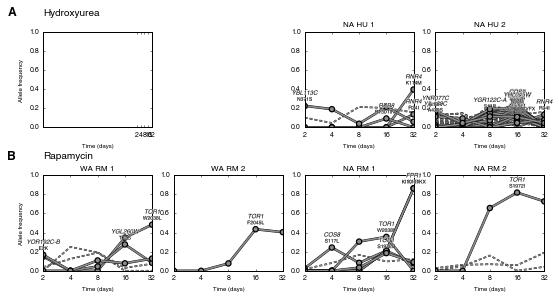

In [82]:
dict_panels = {
    'NA_HU_1':(0,2),
    'NA_HU_2':(0,3),
#     'WE_HU_1':(0,4),
#     'WE_HU_2':(0,5),
#     'SA_HU_1':(0,6),
#     'SA_HU_2':(0,7),
    'WA_RM_1':(0,0),
    'WA_RM_2':(0,1),
    'NA_RM_1':(0,2),
    'NA_RM_2':(0,3),
#     'WE_RM_1':(0,4),
#     'WE_RM_2':(0,5),
#     'SA_RM_1':(0,6),
#     'SA_RM_2':(0,7)
}
from matplotlib.ticker import MultipleLocator, FuncFormatter
from matplotlib.ticker import ScalarFormatter

groups_dn = seq_dn_df[(seq_dn_df.population.isin(dict_panels.keys()))&\
                      (seq_dn_df.clone=='')].groupby(['selection'])

# get a figure with a lot of subplots
fig = plt.figure(figsize=(8, 4), dpi=300)

grid = gridspec.GridSpec(2, 1, hspace=0.5)

gs = {}

for (ii, env) in enumerate(['HU','RM']):
    
    nrows = 1
    ncols = 4
    gs[env] = gridspec.GridSpecFromSubplotSpec(nrows, ncols,
                                               subplot_spec=grid[ii],
                                               hspace=0.35)

    ### de novo mutations ###
    for (jj, (population,gdn)) in enumerate(groups_dn.get_group(env).groupby('population')):
                
        # retrieve axes
        ax = plt.subplot(gs[env][dict_panels[population]])
        ax.set_title(population.replace('_',' '), fontsize=8)

#         custom_dict = {'clone A':0, 'clone B':1, 'clone C':2, 'clone D':3, 'bulk':4}   
#         gdn.loc[:,'rank_assignment'] = gdn['assignment'].map(custom_dict)
#         gdn.sort_values(['rank_assignment','gene','aminoacid'],
#                         inplace=True,ascending=[True,True,True])
#         gdn = gdn.groupby(by=['time','gene','aminoacid','assignment'],
#                           sort=False).sum().groupby(level=[0],sort=False).cumsum().reset_index()
        
#         for (gene, aminoacid, assignment),gdx in gdn.groupby(['gene','aminoacid','assignment']):
#             data = gdx[['freq']].T.fillna(0).values
#             x_pos = np.arange(data.shape[1])
#             for i, d in enumerate(data):
# #                 ax2.plot(x_pos, d, 
# #                          color='k', linewidth=2.5, 
# #                          marker='o', markersize=4)
#                 ax.plot(x_pos, d, 
#                          color=dict_lineages[assignment]['line'], linewidth=1.75, 
#                          marker='o', markersize=4, mec='none',
#                          path_effects=[PathEffects.withStroke(linewidth=2.5, foreground="k")])
#                 index = np.argmax(data)
#                 x,y = (x_pos[index],d[index])
#                 ax.annotate(gene, xy=(x,y), style='italic', xytext = (0, 10), fontsize=6,
#                              textcoords = 'offset points', ha = 'center', va = 'top',
#                              path_effects=[PathEffects.withStroke(linewidth=0.75, foreground="w")])

#         gdn.sort_values(['gene_sgd','amino_acids'],
#                         inplace=True,ascending=[True,True])
#         gdn = gdn.groupby(by=['time','gene_sgd','amino_acids'],
#                           sort=False).sum().groupby(level=[0],sort=False).cumsum().reset_index()

        for (gene, cds, sub, protein_pos, amino_acids, consequence), gdx in \
    gdn.groupby(['gene','cds_position','substitution','protein_position','amino_acids','consequence_short']):

            gdx.time = gdx.time.apply(int)
            gdx = gdx.sort_values('time').reset_index(drop=True)
            gdx = gdx.sort_index()
            gdx = gdx.set_index('time')
            gdx.frequency.plot(ax=ax, kind='line', 
                               color=dict_lineages['bulk']['line'], 
                               **dict_mutation_type[consequence])
            
            if consequence=='non-synonymous':
                index = np.argmax(gdx.frequency)
                ax.annotate(gene, xy=(index,gdx.frequency[index]), style='italic', fontsize=6,
                            textcoords='offset points', xytext=(0, 15), ha = 'center', va = 'top',
                            path_effects=[PathEffects.withStroke(linewidth=0.75, foreground="w")], zorder=3)
                ax.annotate(amino_acids.split('/')[0]+protein_pos+amino_acids.split('/')[1], 
                            xy=(index,gdx.frequency[index]), fontsize=5,
                            textcoords='offset points', xytext=(0, 9), ha = 'center', va = 'top',
                            path_effects=[PathEffects.withStroke(linewidth=0.4, foreground="w")], zorder=3)
    
#             for i, d in enumerate(data):
#                 ax2.plot(x_pos, d, 
#                          color='k', linewidth=2.5, 
#                          marker='o', markersize=4)
#                 ax.plot(x_pos, d, 
#                          color=dict_lineages['bulk']['line'], linewidth=1.75, 
#                          marker='o', markersize=4, mec='none',
#                          path_effects=[PathEffects.withStroke(linewidth=2.5, foreground="k")])
#                 index = np.argmax(data)
#                 x,y = (x_pos[index],d[index])
#                 ax.annotate(gene, xy=(x,y), style='italic', xytext = (0, 10), fontsize=6,
#                              textcoords = 'offset points', ha = 'center', va = 'top',
#                              path_effects=[PathEffects.withStroke(linewidth=0.75, foreground="w")])
    
    # set panel labels
    ax = plt.subplot(gs[env][(0,0)])
    ax.text(-0.25, 1.2,  chr(ii + ord('A')), transform=ax.transAxes,
            fontsize=12, fontweight='bold', va='center', ha='right')
    ax.text(0, 1.2,  dict_environment['short_label'][env], transform=ax.transAxes,
            fontsize=10, va='center', ha='left')
    
#     # legend
#     ax = plt.subplot(gs['HU'][(0,2)])
#     leg = ax.legend(bbox_to_anchor=(1.05, -0.2), frameon=False,
#                     loc='center left', borderaxespad=0.,
#                     handlelength=0.75, title='Lineage', prop={'size':6})
#     plt.setp(leg.get_title(),fontsize=6)
    
    # axes limits
    for ax in fig.get_axes():
        
        # set scales
#         ax.set_xlim(0, 34)
        ax.set_ylim(0, 1)
    
        ax.xaxis.label.set_size(6)
        ax.yaxis.label.set_size(6)
        ax.tick_params(axis='both', which='major', size=2, labelsize=6)
        ax.tick_params(axis='both', which='minor', size=0, labelsize=0)
        
        ax.set_xscale('log', base=2)
        ax.set_xticks([2, 4, 8, 16, 32])
        ax.xaxis.set_major_formatter(ScalarFormatter())
#         # Place tickmarks at every multiple of 1, i.e. at any integer
#         ax.xaxis.set_major_locator(MultipleLocator(2))
#         # Format the ticklabel to be 2 raised to the power of `x`
#         ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: int(2**x)))
        # 
        ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
        
        plt.setp(ax.get_xticklabels(), fontsize=7)
        plt.setp(ax.get_yticklabels(), fontsize=7)
        
        for loc in ['top','bottom','left','right']:
            ax.spines[loc].set_linewidth(1)
            
        # set axes labels
        if ax.is_first_col():
            ax.set_ylabel('Allele frequency')
        if ax.is_last_row():
            ax.set_xlabel('Time (days)')

fig.savefig(dir_thesis+'Chapter3/Figs/Raster/norm_pheno_other_%s.png'%env, dpi=300)
fig.savefig(dir_supp+'figures/figureSX_seq_subclonal_dynamics/figureSX_seq_subclonal_dynamics_parents.png', dpi=300, bbox_inches='tight')
fig.savefig(dir_supp+'figures/figureSX_seq_subclonal_dynamics/figureSX_seq_subclonal_dynamics_parents.svg', dpi=300, bbox_inches='tight')
plt.show()

In [21]:
df = seq_dn_df[(seq_dn_df.population.isin(dict_panels.keys()))]
df = df[df.gene.isin(['RNR2','RNR4','FPR1','TOR1'])]
df[['dp_ref','dp_alt','time']] = df[['dp_ref','dp_alt','time']].astype(int)
df['dp_total'] = df['dp_ref']+df['dp_alt']

# Split delimited values in a DataFrame column into two new columns
# df['fwd_1'], df['fwd_2'], df['fwd_3'] = zip(*df['dp4'].apply(lambda x: x.split(',', 1)))
# zip(*df['dp4'].apply(lambda x: x.split(',')))

df = pd.pivot_table(df, index=['population','chrom','pos'], columns='time', values=['dp_alt','dp_total'])

df = df.reorder_levels([1, 0], axis=1).sort_index(axis=1)

for k,g in df.groupby(level='population'):
    y=g.ix[k].fillna(0).reset_index()
    y.astype(int).to_csv(dir_data+k+'.de_novo_counts.txt',header=False,index=False,sep='\t')


#.sort_values(axis=0)
# pd.pivot_table(df, index=['chrom','pos'], columns='time', values=['dp_alt','dp_total'])
# df.swaplevel(1, 2, axis=1)
# df.dp4.apply(lambda x: x.split(',', 1))
#sample['DP4'][2]+sample['DP4'][3]

# df.fwd_3
# zip(*df['dp4'].apply(lambda x: x.split(',',1)))

## Figure SX - Sequence evolution of WAxNA founders

WAxNA_F12_1_HU_1 (10, 77)
WAxNA_F12_1_HU_1 ('RNR4', 856201.0, '101', 'C>A', '34', 'R/I', 'non-synonymous')
WAxNA_F12_1_HU_1 ('RNR4', 856202.0, '100', 'T>C', '34', 'R/G', 'non-synonymous')
WAxNA_F12_1_HU_3 (20, 77)
WAxNA_F12_1_HU_3 ('RNR2', 392908.0, '505', 'T>C', '169', 'Y/H', 'non-synonymous')
WAxNA_F12_2_HU_1 (15, 77)
WAxNA_F12_2_HU_1 ('RNR4', 856201.0, '101', 'C>A', '34', 'R/I', 'non-synonymous')
WAxNA_F12_2_HU_1 ('RNR4', 856202.0, '100', 'T>C', '34', 'R/G', 'non-synonymous')
WAxNA_F12_2_HU_1 ('YNR066C', 754094.0, '942', 'T>G', '314', 'I', 'synonymous')
WAxNA_F12_2_HU_2 (20, 77)
WAxNA_F12_2_HU_2 ('RNR2', 392854.0, '451', 'A>C', '151', 'N/H', 'non-synonymous')
WAxNA_F12_2_HU_2 ('RNR2', 393020.0, '617', 'C>T', '206', 'T/I', 'non-synonymous')
WAxNA_F12_2_HU_2 ('RNR4', 856201.0, '101', 'C>A', '34', 'R/I', 'non-synonymous')
WAxNA_F12_2_HU_3 (15, 77)
WAxNA_F12_2_HU_3 ('RML2', 60374.0, '478', 'A>G', '160', 'W/R', 'non-synonymous')
WAxNA_F12_2_HU_3 ('RNR2', 392864.0, '461', 'A>G', '154', 'E

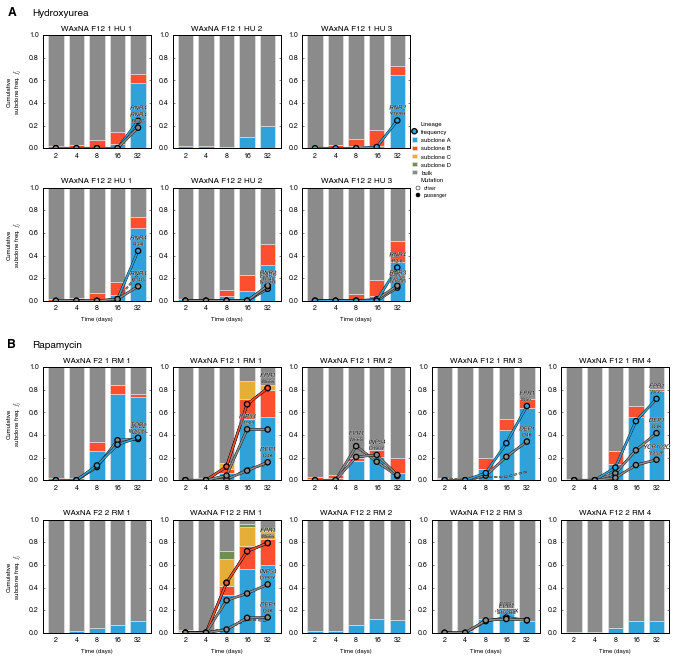

In [84]:
dict_panels = {
    'WAxNA_F2_1_RM_1':(0,0),
    'WAxNA_F2_2_RM_1':(1,0),
    'WAxNA_F12_1_HU_1':(0,0), 
    'WAxNA_F12_1_HU_2':(0,1), 
    'WAxNA_F12_1_HU_3':(0,2), 
    'WAxNA_F12_1_RM_1':(0,1), 
    'WAxNA_F12_1_RM_2':(0,2), 
    'WAxNA_F12_1_RM_3':(0,3), 
    'WAxNA_F12_1_RM_4':(0,4),
    'WAxNA_F12_2_HU_1':(1,0), 
    'WAxNA_F12_2_HU_2':(1,1), 
    'WAxNA_F12_2_HU_3':(1,2),
    'WAxNA_F12_2_RM_1':(1,1), 
    'WAxNA_F12_2_RM_2':(1,2), 
    'WAxNA_F12_2_RM_3':(1,3), 
    'WAxNA_F12_2_RM_4':(1,4)
}

groups_st = seq_st_df[seq_st_df.population.isin(dict_panels.keys())].groupby('selection')
groups_dn = seq_dn_df[(seq_dn_df.population.isin(dict_panels.keys()))].groupby('selection')#&\
                      #(seq_dn_df.clone=='')].groupby(['selection'])


# get a figure with a lot of subplots
fig = plt.figure(figsize=(10, 10), dpi=300)

grid = gridspec.GridSpec(2, 1, hspace=0.25)

gs = {}

for (ii, env) in enumerate(['HU','RM']):
    
    nrows = 2
    ncols = 5
    gs[env] = gridspec.GridSpecFromSubplotSpec(nrows, ncols,
                                               subplot_spec=grid[ii],
                                               hspace=0.35)

    ### de novo mutations ###
    for (jj, (population, gdn)) in enumerate(groups_dn.get_group(env).groupby('population')):
        
        print population, gdn.shape
        
        # retrieve axes
        ax = plt.subplot(gs[env][dict_panels[population]])
        
        for (gene, pos, cds, sub, protein_pos, amino_acids, consequence), gdx \
        in gdn.groupby(['gene','pos','cds_position','substitution','protein_position','amino_acids','consequence_short']):
            print population, (gene, pos, cds, sub, protein_pos, amino_acids, consequence)
            assignment = gdx.assignment.unique()[0]
            mutation_type = gdx.mutation_type.unique()[0]
            
            gdx.time = gdx.time.apply(int)
            gdx = gdx.sort_values('time').reset_index(drop=True)
            gdx = gdx.sort_index()
            
            gdx.frequency.plot(ax=ax, kind='line', 
                               color=dict_lineages[assignment]['line'], 
                               **dict_mutation_type[consequence])
            
            if consequence=='non-synonymous':
                index = np.argmax(gdx.frequency)
                ax.annotate(gene, xy=(index,gdx.frequency[index]), style='italic', fontsize=6,
                            textcoords='offset points', xytext=(0, 15), ha = 'center', va = 'top',
                            path_effects=[PathEffects.withStroke(linewidth=0.5, foreground="w")], zorder=3)
                ax.annotate(amino_acids.split('/')[0]+protein_pos+amino_acids.split('/')[1], 
                            xy=(index,gdx.frequency[index]), fontsize=5,
                            textcoords='offset points', xytext=(0, 9), ha = 'center', va = 'top',
                            path_effects=[PathEffects.withStroke(linewidth=0.4, foreground="w")], zorder=3)

    ### subclone frequency ###
    for (jj, (population, gst)) in enumerate(groups_st.get_group(env).groupby('population')):

        # retrieve axes
        ax = plt.subplot(gs[env][dict_panels[population]])
        # 
        ax.set_title(population.replace('_',' '), fontsize=8)
        # 
        gst = gst.set_index('time')
        gst = gst[['subclone A','subclone B','subclone C','subclone D','bulk']]
        gst.plot(ax=ax, kind='bar',
                 legend=False, stacked=True, width=0.75, position=0.5,
                 color=[dict_lineages[c]['fill'] for c in gst.columns])
        # rotate the x-axis ticks
        plt.setp( ax.xaxis.get_majorticklabels(), rotation=0 )
        ax.set_xlabel('')

 
    # set panel labels
    ax = plt.subplot(gs[env][(0,0)])
    ax.text(-0.25, 1.2,  chr(ii + ord('A')), transform=ax.transAxes,
            fontsize=12, fontweight='bold', va='center', ha='right')
    ax.text(-0.1, 1.2,  dict_environment['short_label'][env], transform=ax.transAxes,
            fontsize=10, va='center', ha='left')
    
    # legends
    ax = plt.subplot(gs['HU'][(0,2)])
    leg1 = ax.legend(bbox_to_anchor=(1.2, 0), ncol=1,
                     frameon=False, loc='center', 
                     borderaxespad=0., handlelength=0.75, 
                     title='Lineage', prop={'size':6})
    
    ax = plt.subplot(gs['HU'][(1,2)])

    driver_artist = lines.Line2D((0,1),(0,0), mec='k', mfc=dict_genotype['color'][1], 
                              marker='o', markersize=4, linestyle='')
    passenger_artist = lines.Line2D((0,1),(0,0), mec='k', mfc=dict_genotype['color'][2],
                              marker='o', markersize=4, linestyle='')
    
    leg2 = ax.legend([driver_artist,passenger_artist], 
                     ['driver','passenger'], 
                     bbox_to_anchor=(1.2, 1), ncol=1,
                     frameon=False, loc='center',
                     borderaxespad=0, handlelength=0.75, 
                     title='Mutation', prop={'size':5})
    
    for leg in [leg1,leg2]:
        plt.setp(leg.get_title(),fontsize=6)
    
    # axes limits
    for ax in fig.get_axes():
        
        ax.set_ylim(0, 1)

        ax.xaxis.label.set_size(6)
        ax.yaxis.label.set_size(6)
        ax.tick_params(axis='both', which='major', size=2, labelsize=6)
        ax.tick_params(axis='both', which='minor', size=0, labelsize=0)
        
        ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
        
        plt.setp(ax.get_xticklabels(), fontsize=7)
        plt.setp(ax.get_yticklabels(), fontsize=7)
        
        for loc in ['top','bottom','left','right']:
            ax.spines[loc].set_linewidth(1)
        
        # set axes labels
        if ax.is_first_col():
            ax.set_ylabel('Cumulative\n subclone freq. $f_j$')
        if ax.is_last_row():
            ax.set_xlabel('Time (days)')

fig.savefig(dir_thesis+'Chapter3/Figs/Raster/norm_pheno_other_%s.png'%env, dpi=300)
fig.savefig(dir_supp+'figures/figureSX_seq_subclonal_dynamics/figureSX_seq_subclonal_dynamics_cross.png', dpi=300, bbox_inches='tight')
fig.savefig(dir_supp+'figures/figureSX_seq_subclonal_dynamics/figureSX_seq_subclonal_dynamics_cross.svg', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
dict_panels = {
    'WAxNA_F12_1_HU_2':0,
    'WAxNA_F12_1_HU_3':1,
    'WAxNA_F12_2_HU_3':2,
    'WAxNA_F12_1_RM_3':0,
    'WAxNA_F12_1_RM_4':1,
    'WAxNA_F12_2_RM_2':2
}

groups_ph = pheno_df[pheno_df.population.isin(dict_panels.keys())]
groups_ph = groups_ph.groupby(['selection'])

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(6, 4), 
                         dpi=300, sharex='row', sharey='row')

for (ii, env) in enumerate(['HU','RM']):
    
    for (jj, (population,gph)) in enumerate(groups_ph.get_group(env).groupby('population')):
        
        # retrieve axes
        ax = axes[dict_panels[population]]
        plt.sca(ax)
        
        for (kk, ((background),g3)) in enumerate(gph.groupby(['background'])):
            
            data = g3.groupby(['isolate']).agg([np.mean])
            X = data[param]['mean'][:, np.newaxis]
            N = np.arange(1, 6)
            
            models = stats.gmm_fit(X, N)

            # compute the AIC and the BIC
            AIC = [m.aic(X) for m in models]
            BIC = [m.bic(X) for m in models]
            
            M_best = models[np.argmin(BIC)]
            
            ax.set_title(population.replace('_',' '), fontsize=10)
            
            # plot data
            x, y = plot.histogram_binned_data(ax, X, bins=34)

            ax.plot(x, y, alpha=0.5, color='w', linewidth=0.25)
            
            ax.fill_between(x, 0, y, label=dict_population['long_label'][background], 
                            alpha=0.5, facecolor=dict_population['color'][background])
            
#             # plot data + best-fit mixture
#             x = np.linspace(X.min()-.2, X.max()+.2, 1000)
#             logprob, responsibilities = M_best.score_samples(np.array([x]).T)
#             pdf = np.exp(logprob)
#             pdf_individual = responsibilities * pdf[:, np.newaxis]

# #             ax.hist(X, 30, normed=True, histtype='stepfilled', alpha=0.5)
#             ax.plot(x, pdf, '-k', lw=1, label=label)
#             ax.plot(x, pdf_individual, '--k', lw=1, label=label)
            
            ax.set_xlabel(r'Rel. growth rate $r_k(t)$')
            ax.set_ylabel(r'Posterior prob. $p(r)$')
        
            ax.xaxis.set_major_locator(MaxNLocator(nbins=5))
            ax.yaxis.set_major_locator(MaxNLocator(nbins=5))

#             print M_best.n_components, M_best.means_.ravel()
    
#             stats.gmm_plot(X, M_best, label=background)
#             plt.sca(axes[1][jj])
#             stats.gmm_components(AIC, BIC, N)
#             plt.sca(axes[2][jj])
#             stats.gmm_posterior(X, M_best)

# # draw legend
# axes[0][2].legend(bbox_to_anchor=(1.05, 0.5), frameon=False, 
#                   loc='lower left', borderaxespad=0.)

#
# axes[0][2].legend(bbox_to_anchor=(1.05, -0.15), frameon=False,
#                   loc='center left', borderaxespad=0.,
#                   handlelength=0.75, title='Lineage')
    
#     fig.subplots_adjust(left=0.12, right=0.97,
#                         bottom=0.21, top=0.9, wspace=0.5)


# set panel labels
axes[0][0].text(-0.15, 1.1,  chr(ord('A')), transform=axes[0][0].transAxes,
                fontsize=12, fontweight='bold', va='top', ha='right')
axes[1][0].text(-0.15, 1.1,  chr(ord('B')), transform=axes[1][0].transAxes,
                fontsize=12, fontweight='bold', va='top', ha='right')
        
# axes limits
for ax in fig.get_axes():
    ax.xaxis.label.set_size(6)
    ax.yaxis.label.set_size(6)
    ax.tick_params(axis='both', which='major', size=2, labelsize=6)
    ax.tick_params(axis='both', which='minor', size=0, labelsize=0)
    
# fig.subplots_adjust(left=0.07,bottom=0.07,right=0.9,top=0.95,wspace=0.15)
fig.savefig(dir_thesis+'Chapter3/Figs/Raster/norm_pheno.png', dpi=300, bbox_inches='tight')
fig.savefig(dir_supp+'figures/figureSX_pheno_evolution/figureSX_pheno_evolution.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(2, 5), sharex=True, sharey=True)

pdf = pheno_df
pdf = pdf[np.isfinite(pdf['growth_rate'])]

fig = plt.figure(figsize=(6, 1), dpi=300)

import matplotlib.gridspec as gridspec
    
formulas = ['growth_rate ~ population',
            'growth_rate ~ population + isolate',
            'growth_rate ~ population + isolate + genotype_long']

grid = gridspec.GridSpec(nrows=1, ncols=5, hspace=0.2, wspace=0.22)

gs = {}
for ii in np.arange(len(formulas)):
    gs[ii] = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=grid[ii], hspace=0)

for ii, formula in enumerate(formulas):
    
    msdf = pdf.groupby(['selection','env_test']).apply(stats.mean_vectors, formula) 
    tsdf = pdf.groupby(['selection','env_test']).apply(stats.variance_vectors, formula) 
    df = tsdf#pd.concat([tsdf, thdf], keys=['spores','hybrids'], names=['type'])
    
    # fix index
#     df = df.swaplevel('type', 'env_evo')
#     df = df.swaplevel('type', 'env_test')
#     df = df.sort_index(level=['env_evo','env_test','type'])
    
    # fix columns
    df = df.rename(columns={'C(spore)':'spore'})
  
    df = df.sort_index(axis=1)
#     order = ['background','de_novo_gene','de_novo_genotype','auxotrophy','tetrad','spore']
#     order = pd.Series(list(set(order) & set(df.columns)))
#     df = df[order]
    
    ax1 = plt.subplot(gs[ii][0])
    utils.simple_axes(ax1)
    
    s = df.ix['HU']
    s = s.sort_index(ascending=False)
    s.plot(ax=ax1, kind='barh', stacked=True, 
#            color=[factor_dict['color'][x] for x in s.columns],
           align='center', legend=False, width=0.75)
    
#     bars = ax1.patches
#     hatches = ''.join([factor_dict['hatch'][x] for x in s.index.get_level_values('type')]*len(s)*2)

#     for bar, hatch in zip(bars, hatches):
#         bar.set_hatch(hatch)
    
    ax1.set_title(formula, fontsize=4)
#     ax1.set_xlabel('')
#     ax1.set_xticks([])
#     ax1.set_xticklabels([])    
#     ystart, yend, ylabels = set_custom_labels(s.index, 0)
#     ax1.set_yticks(ylabels.values(), minor=False)
#     ax1.set_yticklabels(ylabels.keys(), minor=False, fontsize=5)
        
    ax2 = plt.subplot(gs[ii][1])
    utils.simple_axes(ax2)
    
    h = df.ix['RM']
    h = h.sort_index(ascending=False)
    h.plot(ax=ax2, kind='barh', stacked=True, 
#            color=[factor_dict['color'][x] for x in h.columns],
           align='center', legend=False, width=0.75)
    
#     bars = ax2.patches
#     hatches = ''.join([factor_dict['hatch'][x] for x in h.index.get_level_values('type')]*len(h)*2)

#     for bar, hatch in zip(bars, hatches):
#         bar.set_hatch(hatch)
    
#     ax2.set_xlabel('Variance', fontsize=5)    
#     ystart, yend, ylabels = set_custom_labels(h.index, 0)
#     ax2.set_yticks(ylabels.values(), minor=False)
#     ax2.set_yticklabels(ylabels.keys(), minor=False, fontsize=5)
    
    for ax in [ax1,ax2]:
        ax.set_xlim((0,1))
#         ax.set_yticks([])
#         ax.set_yticklabels([])
        ax.set_ylabel('', fontsize=6)

    leg2 = ax2.legend(bbox_to_anchor=(1.05, 1.0), frameon=False,
                      loc='center left', borderaxespad=0.,
                      handlelength=0.75, prop={'size':4})
    
for ax in fig.get_axes():        
        
    plt.setp(ax.get_xticklabels(), fontsize=5)
    plt.setp(ax.get_yticklabels(), fontsize=5)
    
    ax.tick_params(size=2)
        
    for loc in ['top','bottom','left','right']:
        ax.spines[loc].set_linewidth(1)

fig.savefig(dir_supp+'figures/figureSX_pheno_evolution/figureSX_pheno_evolution_anova.png', dpi=300, bbox_inches='tight')
fig.savefig(dir_supp+'figures/figureSX_pheno_evolution/figureSX_pheno_evolution_anova.svg', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
from matplotlib.colors import LogNorm

n_samples = 300

# generate random sample, two components
np.random.seed(0)

# generate spherical data centered on (20, 20)
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([20, 20])

# generate zero centered stretched Gaussian data
C = np.array([[0., -0.7], [3.5, .7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)

# concatenate the two datasets into the final training set
X_train = np.vstack([shifted_gaussian, stretched_gaussian])

# fit a Gaussian Mixture Model with two components
clf = mixture.GMM(n_components=2, covariance_type='full')
clf.fit(X_train)

# display predicted scores by the model as a contour plot
x = np.linspace(-20.0, 30.0)
y = np.linspace(-20.0, 40.0)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)[0]
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.hist(X_train[:, 0], X_train[:, 1])

plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.show()

In [ ]:
from pymc import *

size = 10
p = Uniform( "p", 0 , 1) #this is the fraction that come from mean1 vs mean2

ber = Bernoulli( "ber", p = p, size = size) # produces 1 with proportion p.

precision = Gamma('precision', alpha=0.1, beta=0.1)

mean1 = Normal( "mean1", 0, 0.001 ) #better to use normals versus Uniforms (unless you are certain the value is  truncated at 0 and 200 
mean2 = Normal( "mean2", 0, 0.001 )

@deterministic
def mean( ber = ber, mean1 = mean1, mean2 = mean2):
    return ber*mean1 + (1-ber)*mean2


#generate some artificial data   
v = np.random.randint( 0, 2, size)
data = v*(10+ np.random.randn(size) ) + (1-v)*(-10 + np.random.randn(size ) )


obs = Normal( "obs", mean, precision, value = data, observed = True)

model = Model( {"p":p, "precision": precision, "mean1": mean1, "mean2":mean2, "obs":obs} )